# Week 03 | Siraj Raval | MMWML

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Homework Statement

_The homework for this week is to a build a linear model to classify a fradulent test transaction from a non-fradulent one_

## 0 Obtain the IEEE-CIS Fraud Detection Dataset 2019

_For more information, see [Week 03 README](https://github.com/Dexter1618/MMWML/blob/master/Week03/README.md)_

## 1 Dataset EDA

### 1.1 Read `train_*.csv` files

In [2]:
import pandas as pd
from zipfile import ZipFile

In [3]:
f = ZipFile("../ieee-fraud-detection.zip")
f.infolist()

[<ZipInfo filename='test_identity.csv' compress_type=deflate file_size=25797161 compress_size=3114539>,
 <ZipInfo filename='test_transaction.csv' compress_type=deflate file_size=613194934 compress_size=49628814>,
 <ZipInfo filename='train_identity.csv' compress_type=deflate file_size=26529680 compress_size=3165987>,
 <ZipInfo filename='sample_submission.csv' compress_type=deflate file_size=6080314 compress_size=1192962>,
 <ZipInfo filename='train_transaction.csv' compress_type=deflate file_size=683351067 compress_size=55058592>]

In [4]:
transaction_df = pd.read_csv(f.open("train_transaction.csv"))
identify_df = pd.read_csv(f.open("train_identity.csv"))

In [5]:
transaction_df.sample(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
212232,3199232,0,4921356,83.50,W,13108,215.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
312781,3299781,0,7778707,39.00,W,12695,490.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
257515,3244515,0,6187109,117.00,W,5840,532.0,150.0,mastercard,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
551031,3538031,0,14568370,200.00,R,18268,583.0,150.0,visa,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
464201,3451201,0,11931306,35.95,W,1444,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
identify_df.sample(5)

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
52322,3103952,-5.0,161810.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,F,mobile,iOS Device
134796,3532306,-15.0,360853.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,chrome 63.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G900FD
50909,3101721,-15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46478,3095540,-5.0,160674.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 63.0 for android,32.0,1920x1080,match_status:2,T,F,T,F,mobile,SM-G935V Build/NRD90M
139425,3551838,-5.0,515934.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 66.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,M4


### 1.2 Concatenate dataframes

Reason: _I will consider all features available to me: ones specific to the user identity and the ones specific to the properties of a transaction_

In [7]:
transaction_df["TransactionID"].unique()

array([2987000, 2987001, 2987002, ..., 3577537, 3577538, 3577539],
      dtype=int64)

In [8]:
identify_df["TransactionID"].unique()

array([2987004, 2987008, 2987010, ..., 3577529, 3577531, 3577534],
      dtype=int64)

In [9]:
transaction_df.set_index("TransactionID", inplace = True)
identify_df.set_index("TransactionID", inplace = True)

In [10]:
df = pd.concat([transaction_df, identify_df], axis = 1, join = "inner")

In [11]:
df.shape

(144233, 433)

In [12]:
df.columns

Index(['isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1',
       'card2', 'card3', 'card4', 'card5', 'card6',
       ...
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object', length=433)

In [13]:
df.sample(5)

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,
3316336,1,8105987,18.670,C,14276,177.0,185.0,mastercard,137.0,credit,...,mobile safari generic,NaN,NaN,NaN,F,F,F,F,mobile,NaN
3495274,0,13306547,24.838,C,1976,545.0,185.0,visa,102.0,credit,...,chrome generic,NaN,NaN,NaN,F,F,T,F,desktop,NaN
3553412,0,15017335,150.000,R,5465,418.0,150.0,mastercard,203.0,credit,...,chrome 66.0,24.0,1366x768,match_status:2,T,F,T,F,desktop,Windows
3565787,0,15425138,250.000,R,4425,562.0,150.0,mastercard,197.0,credit,...,mobile safari 11.0,32.0,2048x1536,match_status:1,T,F,F,F,mobile,iOS Device
3098841,0,2175255,12.709,C,18093,500.0,185.0,mastercard,224.0,credit,...,safari generic,NaN,NaN,NaN,F,F,F,T,desktop,NaN


### 1.3 Class distribution and Sampling fix

In [14]:
df["isFraud"].value_counts()

0    132915
1     11318
Name: isFraud, dtype: int64

_The dataset is massively imbalanced. I will use `imblearn.under_sampling.RandomUnderSampler` to fix this issue. And yes, I am aware that I am purposely losing data_

In [15]:
X = df.drop("isFraud", axis = 1)
Y = df["isFraud"]

In [16]:
na_count = X.isna().sum()
n_observations = X.shape[0]

_I eliminate columns where there are more than `25%` NA values of the total number of observations_

In [17]:
X.dropna(thresh = int(0.75 * n_observations), axis = 1, inplace = True)

In [18]:
X.fillna(value = 0, inplace = True)

In [19]:
columns = X.columns

_I perform Random Under-Sampling from the majority class_

In [20]:
from imblearn.under_sampling import RandomUnderSampler

sampler = RandomUnderSampler(random_state = 42)
X, Y = sampler.fit_sample(X, Y)

In [21]:
X.shape, Y.shape

((22636, 245), (22636,))

_Instead of working with such a large dataset, let's work with a subset randomly sampled from `X` and `Y`_

_The returned variables from `sampler` are numpy matrices. I still need `X` as a `pd.DataFrame` to perform descriptive analyses_

In [22]:
X = pd.DataFrame(X)
X.columns = columns

X["isFraud"] = Y
X = X.sample(int(0.3 * X.shape[0]))

Y = X["isFraud"]
X = X.drop("isFraud", axis = 1)

In [23]:
Y.value_counts()

0    3414
1    3376
Name: isFraud, dtype: int64

### 1.4 Column-wise analysis

In [24]:
columns_to_be_dropped_after_analysis = []

#### 1.4.1 Assumption = `TransactionDT` and `DeviceInfo` are not required

In [25]:
columns_to_be_dropped_after_analysis.extend(["TransactionDT", "DeviceInfo"])
columns_to_be_dropped_after_analysis

['TransactionDT', 'DeviceInfo']

#### 1.4.2 `ProductCD`

In [26]:
X["ProductCD"].value_counts()

C    3632
R    1370
H    1302
S     486
Name: ProductCD, dtype: int64

In [27]:
temp = pd.get_dummies(X["ProductCD"])
temp["isFraud"] = Y

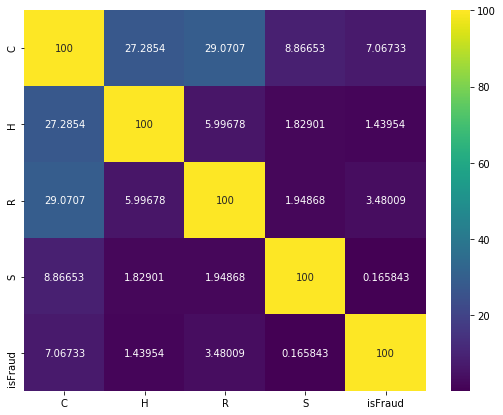

In [28]:
# plot strength of correlation ( = R^2) as a percentage
plt.rcParams['figure.figsize'] = 9, 7
sns.heatmap(temp.corr() ** 2 * 100, annot = True, fmt = "g", cmap = 'viridis')
plt.show()

In [29]:
corr_matrix = temp.corr() ** 2 * 100

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))

# Find index of feature columns with correlation greater than 25%
to_drop = ["ProductCD_" + column for column in upper.columns if any(upper[column] > 25)]

# how many variables can we drop
len(to_drop)

2

In [30]:
columns_to_be_dropped_after_analysis.extend(to_drop)
print(columns_to_be_dropped_after_analysis)

['TransactionDT', 'DeviceInfo', 'ProductCD_H', 'ProductCD_R']


In [31]:
X = pd.get_dummies(X, columns = ["ProductCD"])

#### 1.4.3 `cardxx` variables

In [32]:
card_variables = ["card" + str(i + 1) for i in range(6)]

In [33]:
X[card_variables].sample(5)

,card1,card2,card3,card4,card5,card6
10601,15885,545,185,visa,138,debit
13969,9026,545,185,visa,137,credit
8229,8503,583,150,visa,226,credit
15073,1724,583,150,visa,226,credit
10726,13413,103,185,visa,137,credit


In [34]:
for column in card_variables:
    value_counts = X[column].value_counts()
    print("%s has %i unique values" % (column, len(value_counts)))
    if 0 in value_counts.index:
        print("[has %i '0's as a class]\n" % value_counts[0])

card1 has 1477 unique values
card2 has 271 unique values
[has 87 '0's as a class]

card3 has 58 unique values
[has 6 '0's as a class]

card4 has 5 unique values
[has 6 '0's as a class]

card5 has 57 unique values
[has 41 '0's as a class]

card6 has 3 unique values
[has 6 '0's as a class]



In [35]:
X["card4"].value_counts()

visa                4206
mastercard          2182
american express     302
discover              94
0                      6
Name: card4, dtype: int64

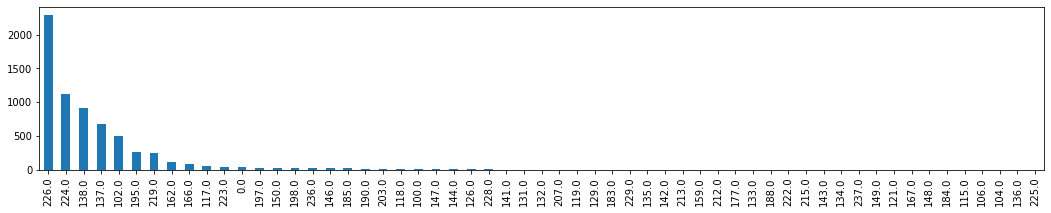

In [36]:
plt.rcParams['figure.figsize'] = 18,  3
X["card5"].value_counts().plot(kind = "bar")
plt.show()

In [37]:
temp = X.copy(deep = True)
temp["isFraud"] = Y

temp = temp.query("card2 != 0 and card3 != 0 and card4 != 0 and card5 != 0 and card6 != 0")

Y = temp["isFraud"]
X = temp.drop("isFraud", axis = 1)

_Too many dummy variables to sort out, So I leave this group be_

In [38]:
X = pd.get_dummies(X, columns = card_variables)

#### 1.4.4 `P_emaildomain` and `R_emaildomain`

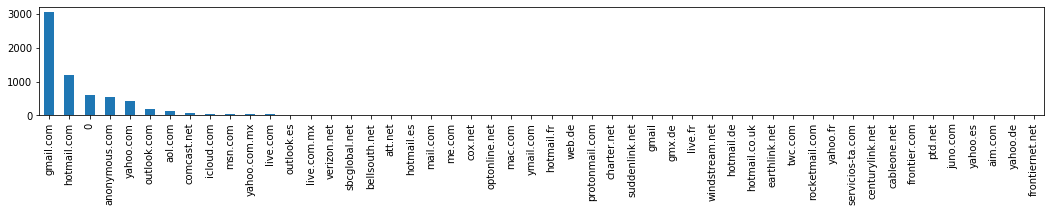

In [39]:
plt.rcParams['figure.figsize'] = 18, 2
X["P_emaildomain"].value_counts().plot(kind = "bar")
plt.show()

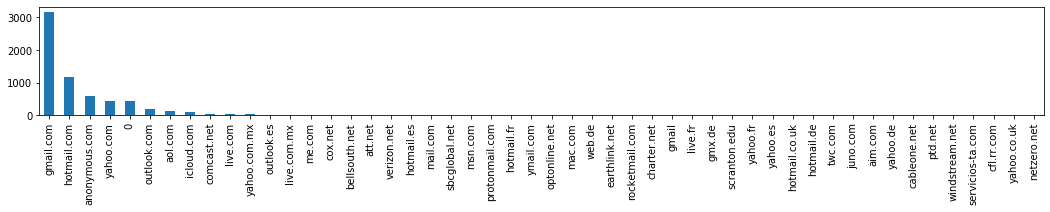

In [40]:
plt.rcParams['figure.figsize'] = 18, 2
X["R_emaildomain"].value_counts().plot(kind = "bar")
plt.show()

_Let's see what correlations we get amongst these email domains and the response variable_

In [41]:
temp = pd.get_dummies(X[["P_emaildomain", "R_emaildomain"]])

In [42]:
corr_matrix = temp.corr() ** 2 * 100

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))

# Find index of feature columns with correlation greater than 25%
to_drop = [column for column in upper.columns if any(upper[column] > 25)]

# how many variables can we drop
len(to_drop)

29

In [43]:
columns_to_be_dropped_after_analysis.extend(to_drop)
print(columns_to_be_dropped_after_analysis)

['TransactionDT', 'DeviceInfo', 'ProductCD_H', 'ProductCD_R', 'R_emaildomain_aim.com', 'R_emaildomain_anonymous.com', 'R_emaildomain_att.net', 'R_emaildomain_cableone.net', 'R_emaildomain_cox.net', 'R_emaildomain_gmail', 'R_emaildomain_gmail.com', 'R_emaildomain_gmx.de', 'R_emaildomain_hotmail.co.uk', 'R_emaildomain_hotmail.com', 'R_emaildomain_hotmail.de', 'R_emaildomain_hotmail.es', 'R_emaildomain_hotmail.fr', 'R_emaildomain_icloud.com', 'R_emaildomain_juno.com', 'R_emaildomain_live.com', 'R_emaildomain_live.com.mx', 'R_emaildomain_live.fr', 'R_emaildomain_mail.com', 'R_emaildomain_outlook.com', 'R_emaildomain_outlook.es', 'R_emaildomain_rocketmail.com', 'R_emaildomain_servicios-ta.com', 'R_emaildomain_web.de', 'R_emaildomain_yahoo.com.mx', 'R_emaildomain_yahoo.de', 'R_emaildomain_yahoo.es', 'R_emaildomain_yahoo.fr', 'R_emaildomain_ymail.com']


In [44]:
X = pd.get_dummies(X, columns = ["P_emaildomain", "R_emaildomain"])

#### 1.4.5 `C1` to `C14` | `D1`  to `D15` 


In [45]:
generated_query = []

for i in range(1, 15):
    column_name = "C" + str(i)
    if column_name in X.columns:
        generated_query.append(column_name + " != 0 and ")
for i in range(1, 10):
    column_name = "M" + str(i)
    if column_name in X.columns:
        generated_query.append(column_name + " != 0 and ")

generated_query = ''.join(generated_query)[:-5]
generated_query

'C1 != 0 and C2 != 0 and C3 != 0 and C4 != 0 and C5 != 0 and C6 != 0 and C7 != 0 and C8 != 0 and C9 != 0 and C10 != 0 and C11 != 0 and C12 != 0 and C13 != 0 and C14 != 0'

In [46]:
# oops

X.query(generated_query)

,TransactionDT,TransactionAmt,C1,C2,C3,C4,C5,C6,C7,C8,...,R_emaildomain_verizon.net,R_emaildomain_web.de,R_emaildomain_windstream.net,R_emaildomain_yahoo.co.uk,R_emaildomain_yahoo.com,R_emaildomain_yahoo.com.mx,R_emaildomain_yahoo.de,R_emaildomain_yahoo.es,R_emaildomain_yahoo.fr,R_emaildomain_ymail.com


In [47]:
temp_corr_columns = []

for i in range(1, 15):
    column_name = "C" + str(i)
    if column_name in X.columns:
        temp_corr_columns.append(column_name)

for i in range(1, 16):
    column_name = "D" + str(i)
    if column_name in X.columns:
        temp_corr_columns.append(column_name)

print(temp_corr_columns)

['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1']


In [48]:
temp = pd.DataFrame(X[temp_corr_columns].values, dtype = int)
temp.columns = temp_corr_columns
temp["isFraud"] = Y
temp.sample(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,isFraud
5303,1,1,0,1,0,1,0,1,0,1,1,0,1,1,0,0.0
1208,1,1,0,1,0,1,1,1,0,1,1,1,1,1,0,0.0
1880,1,0,0,1,0,1,1,1,0,1,1,1,0,0,0,0.0
1640,1,1,0,1,0,1,0,1,0,1,1,0,1,1,0,NaN
560,4,5,0,1,0,1,2,2,0,1,3,3,1,1,0,NaN


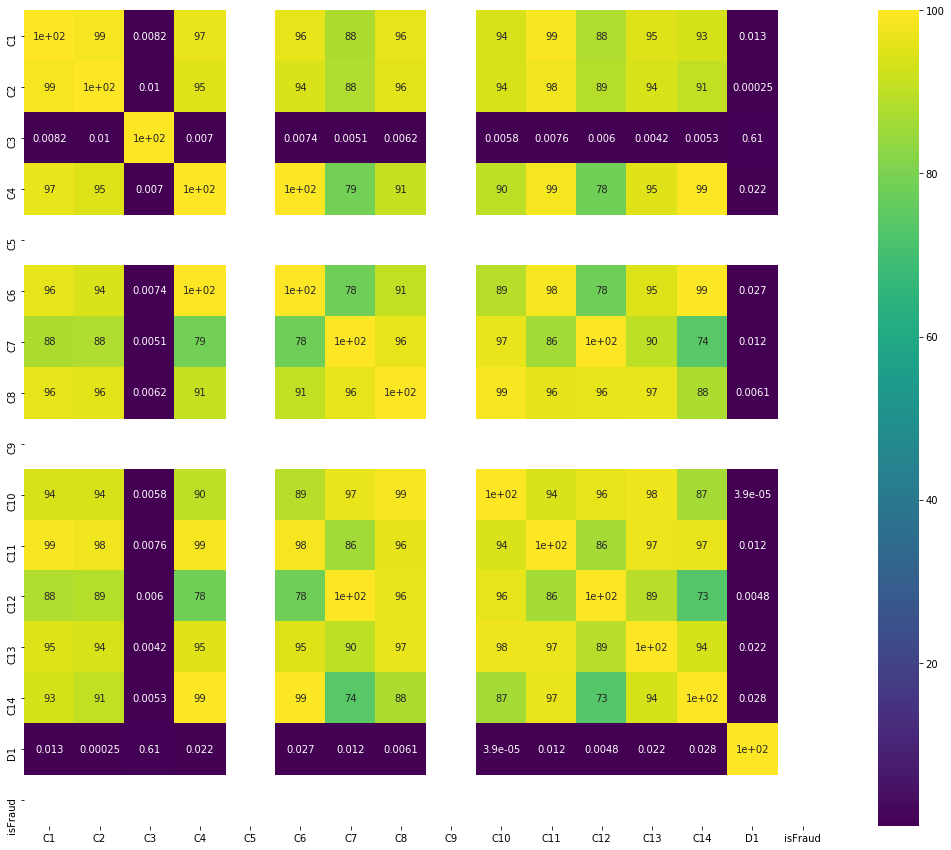

In [49]:
# plot strength of correlation ( = R^2) as a percentage
plt.rcParams['figure.figsize'] = 18, 15

sns.heatmap(temp.corr() ** 2 * 100, annot = True, cmap = 'viridis')
plt.show()

In [50]:
# average strength of correlation of a variable with every one else

(temp.corr() ** 2 * 100).sum()/len(temp.columns)

C1         65.293278
C2         64.807279
C3          6.292781
C4         63.919488
C5          0.000000
C6         63.717910
C7         60.988459
C8         65.396376
C9          0.000000
C10        64.875039
C11        65.632901
C12        60.891952
C13        65.186865
C14        62.173593
D1          6.297415
isFraud     0.000000
dtype: float64

In [51]:
corr_matrix = temp.corr() ** 2 * 100

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))

# Find index of feature columns with correlation greater than 25%
to_drop = [column for column in upper.columns if any(upper[column] > 25)]

# how many variables can we drop
len(to_drop)

10

In [52]:
[column for column in temp.columns if column not in to_drop]

['C1', 'C3', 'C5', 'C9', 'D1', 'isFraud']

_`C5` and `C9` are null columns_

In [53]:
columns_to_be_dropped_after_analysis.extend(to_drop)
columns_to_be_dropped_after_analysis.extend(["C5", "C9"])
print(columns_to_be_dropped_after_analysis)

['TransactionDT', 'DeviceInfo', 'ProductCD_H', 'ProductCD_R', 'R_emaildomain_aim.com', 'R_emaildomain_anonymous.com', 'R_emaildomain_att.net', 'R_emaildomain_cableone.net', 'R_emaildomain_cox.net', 'R_emaildomain_gmail', 'R_emaildomain_gmail.com', 'R_emaildomain_gmx.de', 'R_emaildomain_hotmail.co.uk', 'R_emaildomain_hotmail.com', 'R_emaildomain_hotmail.de', 'R_emaildomain_hotmail.es', 'R_emaildomain_hotmail.fr', 'R_emaildomain_icloud.com', 'R_emaildomain_juno.com', 'R_emaildomain_live.com', 'R_emaildomain_live.com.mx', 'R_emaildomain_live.fr', 'R_emaildomain_mail.com', 'R_emaildomain_outlook.com', 'R_emaildomain_outlook.es', 'R_emaildomain_rocketmail.com', 'R_emaildomain_servicios-ta.com', 'R_emaildomain_web.de', 'R_emaildomain_yahoo.com.mx', 'R_emaildomain_yahoo.de', 'R_emaildomain_yahoo.es', 'R_emaildomain_yahoo.fr', 'R_emaildomain_ymail.com', 'C2', 'C4', 'C6', 'C7', 'C8', 'C10', 'C11', 'C12', 'C13', 'C14', 'C5', 'C9']


_Looks like `C1`, `C3`, and `D1` are good enough by themselves_

_Alright. No `M*` columns to worry about then_

#### 1.4.6 `V*`

In [54]:
v_columns = [column for column in X.columns if column[0] == "V"]
len(v_columns)

198

In [55]:
len([column for column in v_columns if isinstance(X[column], object)])

198

_All of them are set as `str` objects by `pandas`_

In [56]:
temp = pd.DataFrame(X[v_columns].values, dtype = int)
temp.columns = v_columns
temp["isFraud"] = Y
temp.sample(5)

,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,...,V313,V314,V315,V316,V317,V318,V319,V320,V321,isFraud
6598,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
227,2,8,2,0,2,0,2,5,2,0,...,0,0,0,100,175,100,0,25,0,0.0
2291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,52,52,52,0,0,0,NaN
522,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2153,8,8,8,1,1,1,0,0,0,7,...,0,0,0,0,0,0,25,25,25,0.0


In [57]:
corr_matrix = temp.corr() ** 2 * 100

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))

# Find index of feature columns with correlation greater than 25%
to_drop = [column for column in upper.columns if any(upper[column] > 25)]

# how many variables can we drop
len(to_drop)

181

In [58]:
columns_to_be_dropped_after_analysis.extend(to_drop)
print(columns_to_be_dropped_after_analysis)

['TransactionDT', 'DeviceInfo', 'ProductCD_H', 'ProductCD_R', 'R_emaildomain_aim.com', 'R_emaildomain_anonymous.com', 'R_emaildomain_att.net', 'R_emaildomain_cableone.net', 'R_emaildomain_cox.net', 'R_emaildomain_gmail', 'R_emaildomain_gmail.com', 'R_emaildomain_gmx.de', 'R_emaildomain_hotmail.co.uk', 'R_emaildomain_hotmail.com', 'R_emaildomain_hotmail.de', 'R_emaildomain_hotmail.es', 'R_emaildomain_hotmail.fr', 'R_emaildomain_icloud.com', 'R_emaildomain_juno.com', 'R_emaildomain_live.com', 'R_emaildomain_live.com.mx', 'R_emaildomain_live.fr', 'R_emaildomain_mail.com', 'R_emaildomain_outlook.com', 'R_emaildomain_outlook.es', 'R_emaildomain_rocketmail.com', 'R_emaildomain_servicios-ta.com', 'R_emaildomain_web.de', 'R_emaildomain_yahoo.com.mx', 'R_emaildomain_yahoo.de', 'R_emaildomain_yahoo.es', 'R_emaildomain_yahoo.fr', 'R_emaildomain_ymail.com', 'C2', 'C4', 'C6', 'C7', 'C8', 'C10', 'C11', 'C12', 'C13', 'C14', 'C5', 'C9', 'V96', 'V97', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V10

#### 1.4.7 `id*`

In [59]:
id_columns = [column for column in X.columns if column[0:2] == "id"]
print(id_columns)

['id_01', 'id_02', 'id_05', 'id_06', 'id_11', 'id_12', 'id_13', 'id_15', 'id_16', 'id_17', 'id_19', 'id_20', 'id_28', 'id_29', 'id_31', 'id_35', 'id_36', 'id_37', 'id_38']


In [60]:
# id12 - id 36 are categorical

id_columns_categorical = [column for column in id_columns if int(column[3:]) > 11]
print(id_columns_categorical)

id_columns_numeric = [column for column in id_columns if column not in id_columns_categorical]
print(id_columns_numeric)

['id_12', 'id_13', 'id_15', 'id_16', 'id_17', 'id_19', 'id_20', 'id_28', 'id_29', 'id_31', 'id_35', 'id_36', 'id_37', 'id_38']
['id_01', 'id_02', 'id_05', 'id_06', 'id_11']


In [61]:
temp = X[id_columns].copy(deep = True)
temp.columns = id_columns
temp[id_columns_numeric] = temp[id_columns_numeric].astype(int)

temp.sample(5)

,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_31,id_35,id_36,id_37,id_38
4538,-5,120846,0,0,100,NotFound,52,Found,Found,166,529,222,Found,Found,chrome 63.0,T,F,T,F
17602,-5,43647,0,0,100,Found,52,New,NotFound,166,216,161,Found,Found,chrome 64.0,T,F,T,T
784,-5,67661,4,0,100,Found,49,New,NotFound,166,100,368,New,NotFound,mobile safari 11.0,T,F,F,T
6550,-5,210141,0,0,100,NotFound,52,Found,NotFound,100,225,314,Found,NotFound,chrome 65.0,F,F,T,F
7270,-5,32446,1,0,100,NotFound,52,Found,Found,166,529,549,Found,Found,chrome 62.0,T,F,T,T


In [62]:
generated_query = ''.join([column + " != 0 and " for column in id_columns_categorical])[:-5]
generated_query

'id_12 != 0 and id_13 != 0 and id_15 != 0 and id_16 != 0 and id_17 != 0 and id_19 != 0 and id_20 != 0 and id_28 != 0 and id_29 != 0 and id_31 != 0 and id_35 != 0 and id_36 != 0 and id_37 != 0 and id_38 != 0'

In [63]:
temp = X.copy(deep = True)
temp["isFraud"] = Y

temp = temp.query(generated_query)

Y = temp["isFraud"]
X = temp.drop("isFraud", axis = 1)
X[id_columns_numeric] = X[id_columns_numeric].astype(int)

temp = X[id_columns_categorical].copy(deep = True)
temp = pd.get_dummies(temp, id_columns_categorical)

In [64]:
corr_matrix = temp.corr() ** 2 * 100

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))

# Find index of feature columns with correlation greater than 25%
to_drop = [column for column in upper.columns if any(upper[column] > 25)]

# how many variables can we drop
len(to_drop)

85

In [65]:
columns_to_be_dropped_after_analysis.extend(to_drop)
print(columns_to_be_dropped_after_analysis)

['TransactionDT', 'DeviceInfo', 'ProductCD_H', 'ProductCD_R', 'R_emaildomain_aim.com', 'R_emaildomain_anonymous.com', 'R_emaildomain_att.net', 'R_emaildomain_cableone.net', 'R_emaildomain_cox.net', 'R_emaildomain_gmail', 'R_emaildomain_gmail.com', 'R_emaildomain_gmx.de', 'R_emaildomain_hotmail.co.uk', 'R_emaildomain_hotmail.com', 'R_emaildomain_hotmail.de', 'R_emaildomain_hotmail.es', 'R_emaildomain_hotmail.fr', 'R_emaildomain_icloud.com', 'R_emaildomain_juno.com', 'R_emaildomain_live.com', 'R_emaildomain_live.com.mx', 'R_emaildomain_live.fr', 'R_emaildomain_mail.com', 'R_emaildomain_outlook.com', 'R_emaildomain_outlook.es', 'R_emaildomain_rocketmail.com', 'R_emaildomain_servicios-ta.com', 'R_emaildomain_web.de', 'R_emaildomain_yahoo.com.mx', 'R_emaildomain_yahoo.de', 'R_emaildomain_yahoo.es', 'R_emaildomain_yahoo.fr', 'R_emaildomain_ymail.com', 'C2', 'C4', 'C6', 'C7', 'C8', 'C10', 'C11', 'C12', 'C13', 'C14', 'C5', 'C9', 'V96', 'V97', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V10

In [66]:
X = pd.get_dummies(X, columns = id_columns_categorical)

#### 1.4.8 `DeviceType`

In [67]:
X = pd.get_dummies(X, "DeviceType")
X.shape

(5241, 46904)

### 1.5 Removing columns after analysis

In [68]:
X.shape, Y.shape

((5241, 46904), (5241,))

In [69]:
for column in X.columns:
    try:
        X[column].astype("float32")
    except:
        print(column)

## 2 Dataset Modelling

### 2.1 Creating train and test datasets out of `X` and `Y`

In [71]:
X = X.values
Y = Y.values

X.shape, Y.shape, type(X), type(Y)

((5241, 46904), (5241,), numpy.ndarray, numpy.ndarray)

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 123)
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size = 0.1, random_state = 123)

In [78]:
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape

((3668, 46904), (3668,), (1415, 46904), (1415,), (158, 46904), (158,))

### 2.2 Training and Cross-validating a `LogisticRegression` Model

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
lr = LogisticRegression(solver = "liblinear", random_state = 123)
lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=123, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
from sklearn.model_selection import cross_val_score

In [84]:
score = cross_val_score(lr, X_val, Y_val, cv = 10, verbose = 3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.706, total=   0.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] .................................... , score=0.761, total=   0.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


[CV] .................................... , score=0.718, total=   0.5s
[CV]  ................................................................
[CV] .................................... , score=0.739, total=   0.5s
[CV]  ................................................................
[CV] .................................... , score=0.759, total=   0.5s
[CV]  ................................................................
[CV] .................................... , score=0.759, total=   0.5s
[CV]  ................................................................
[CV] .................................... , score=0.823, total=   0.5s
[CV]  ................................................................
[CV] .................................... , score=0.794, total=   0.5s
[CV]  ................................................................
[CV] .................................... , score=0.759, total=   0.5s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.3s finished


In [88]:
print("Mean Validation Accuracy = %0.04f" % np.mean(score))
print("Median Validation Accuracy = %0.04f" % np.median(score))

Mean Validation Accuracy = 0.7620
Median Validation Accuracy = 0.7589


### 2.3 Model Testing and Model Evaluation

In [89]:
from sklearn.metrics import classification_report

In [90]:
yhat = lr.predict(X_test)
yhat.shape, Y_test.shape

((158,), (158,))

In [92]:
print(classification_report(Y_test, yhat))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76        72
           1       0.82      0.74      0.78        86

    accuracy                           0.77       158
   macro avg       0.77      0.77      0.77       158
weighted avg       0.78      0.77      0.77       158



_For a baseline attempt to clean the dataset and obtain an `F(1)` of `76%` is alright, I think_

## 3 Concluding remarks

- Cleaning the dataset and obtaining a meaningful `tidy` version of it is the crucial part 
- `90%` of the effort required to obtain a good useful ML model lies in obtaining the `tidy` dataset
- Model Tweaking is not very important for this project, but that's just me speculating